In [36]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error


In [3]:
df=pd.read_csv('AAPL.csv')

In [4]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [5]:
# check is there any null values
df.isnull().sum()


Unnamed: 0     0
symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [6]:
# check duplicated values
df.duplicated().sum()


0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 147.5+ KB


In [8]:
df1=df.reset_index()['close']

In [9]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [10]:
# Scaling with MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)


[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [11]:
## splitting dataset into train and test split

training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size


(817, 441)

In [12]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ## i=0, 0,1,2,3-----99 i.e 100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0]) # appending 100th value when i=0
	return numpy.array(dataX), numpy.array(dataY)


In [13]:
# reshape into X=t,t+1,t+2,t+3 till 100 and Y=t+101

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train.shape), print(y_train.shape)


(716, 100)
(716,)


(None, None)

In [14]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [15]:
!pip install tensorflow

In [16]:
# reshape input to be [samples, time steps, features] which is required for LSTM

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [18]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [19]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 15s 625ms/step - loss: 0.0167 - val_loss: 0.0609
Epoch 2/100
12/12 [==============================] - 6s 462ms/step - loss: 0.0038 - val_loss: 0.0044
Epoch 3/100
12/12 [==============================] - 5s 403ms/step - loss: 0.0012 - val_loss: 0.0072
Epoch 4/100
12/12 [==============================] - 4s 289ms/step - loss: 0.0012 - val_loss: 0.0035
Epoch 5/100
12/12 [==============================] - 3s 262ms/step - loss: 9.8011e-04 - val_loss: 0.0063
Epoch 6/100
12/12 [==============================] - 2s 201ms/step - loss: 6.2163e-04 - val_loss: 0.0054
Epoch 7/100
12/12 [==============================] - 2s 186ms/step - loss: 6.4361e-04 - val_loss: 0.0050
Epoch 8/100
12/12 [==============================] - 2s 203ms/step - loss: 6.7812e-04 - val_loss: 0.0040
Epoch 9/100
12/12 [==============================] - 2s 189ms/step - loss: 6.5539e-04 - val_loss: 0.0035
Epoch 10/100
12/12 [==============================] - 3s 233ms/step - 

In [35]:
## Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

print('Prediction using training data : \n',train_predict)
print('Prediction using testing data : \n',test_predict)

11/11 [==============================] - 0s 35ms/step
Prediction using training data : 
 [[0.08826916]
 [0.0879628 ]
 [0.08769435]
 [0.08877445]
 [0.09103494]
 [0.09475797]
 [0.10116542]
 [0.10677678]
 [0.10958881]
 [0.11225752]
 [0.11600877]
 [0.11971481]
 [0.12352594]
 [0.12773733]
 [0.13131627]
 [0.13292037]
 [0.13261232]
 [0.13074212]
 [0.12579398]
 [0.11869951]
 [0.11124379]
 [0.10308724]
 [0.09660424]
 [0.09247194]
 [0.09272672]
 [0.09739301]
 [0.10486081]
 [0.11194526]
 [0.11755888]
 [0.12054344]
 [0.12080667]
 [0.11941034]
 [0.1167772 ]
 [0.11313833]
 [0.10874321]
 [0.1068136 ]
 [0.10729755]
 [0.10933755]
 [0.11037424]
 [0.1102118 ]
 [0.10746164]
 [0.10257778]
 [0.09593438]
 [0.0896185 ]
 [0.08363274]
 [0.07704599]
 [0.07134355]
 [0.06732929]
 [0.06593353]
 [0.06651331]
 [0.06761973]
 [0.06957157]
 [0.07128672]
 [0.07126335]
 [0.06964421]
 [0.06581443]
 [0.05973291]
 [0.05073266]
 [0.04087611]
 [0.03290142]
 [0.0285568 ]
 [0.02655662]
 [0.02700491]
 [0.02814364]
 [0.02893684]
 

In [21]:
## Transform back data to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [22]:
## Calculate MSE performance metrics

math.sqrt(mean_squared_error(y_train,train_predict))


141.16606845676634

In [23]:
## Test Data MSE

math.sqrt(mean_squared_error(ytest,test_predict))


235.90331645905988

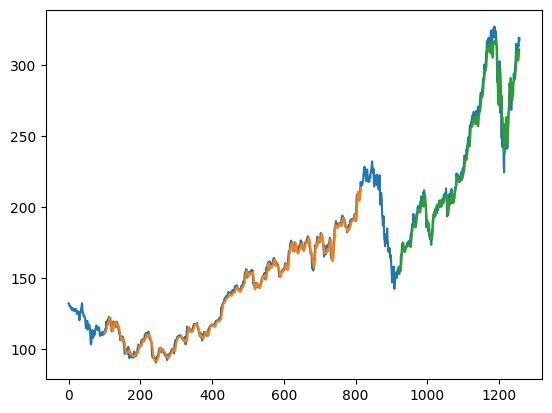

In [24]:
## Plotting train and test data division visually

import matplotlib.pyplot as plt

# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [25]:
len(test_data)


441

In [26]:
# Taking last 100 inputs as we are taking 100 previous time steps from test data and creating x_input which we will use for predicting next 3 days

x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [27]:
# Printing x_input

temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [28]:
# Performing predictions for next 3 days using above trained LSTM model.

from numpy import array

lst_output=[]
n_steps=100 # time steps
i=0


# As we want to predict for next 3 days , Hence taking less than 3
while(i<3):

    if(len(temp_input)>100):  # In the else block, when the loop enters for the first time, the model makes predictions based
                                        # on a fixed window size of 100 time steps. However, after making the first prediction,
                                            # we need to shift the input sequence by 1 time step to maintain the window size of 100 steps.

        x_input=np.array(temp_input[1:])   # In the line we exclude the first element (temp_input[0]) from the temp_input list using slicing ([1:]) to maintain 100 size window.
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1)) # Now making its parameter suitable to go in LSTM model
        #print(x_input)
        yhat = model.predict(x_input, verbose=0) # predictions
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist()) # Adding newly predicted value
        temp_input=temp_input[1:] # updating temp_input
        #print(temp_input)
        lst_output.extend(yhat.tolist()) # updating output list - lst_output
        i=i+1

    else:
                                                    # During the first iteration, we predict the next day's value, add it to our input sequence (temp_input), and save it in our output list (lst_output).
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)


[0.9457212]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.9

In [29]:
# Making range for ploting

day_new=np.arange(1,101)
day_pred=np.arange(101,104)
import matplotlib.pyplot as plt
len(df1)


1258

In [30]:
day_pred

array([101, 102, 103])

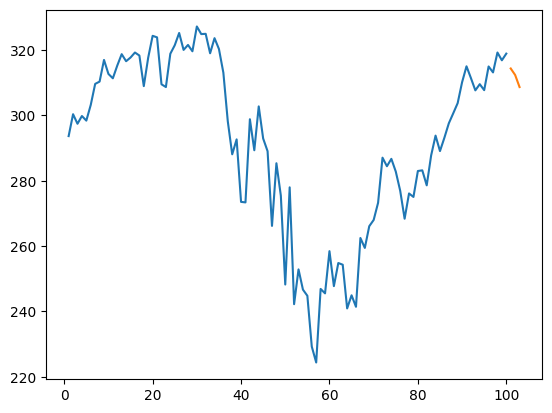

In [31]:
# We plot our new predictions alongside the previous 100 days of data. The orange line represents the new 3-day predictions,
# providing a visual comparison with the historical data.

plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))


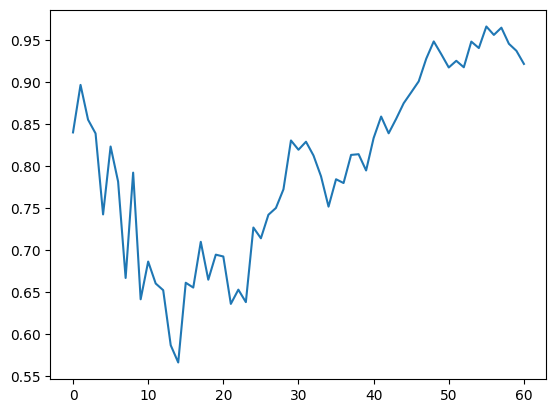

In [32]:
# Adding data and visualize it as a smooth curve

df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])


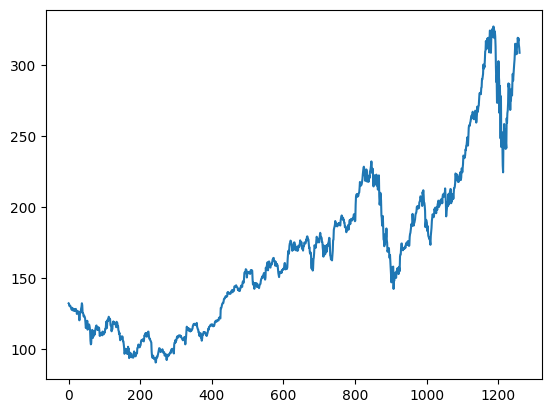

In [33]:
# Visualizing in whole data

df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)